# Business Understanding

The goal of this analysis is to understand global education trends. 
We aim to explore literacy rates, education spending, student enrollment, and how they vary across countries.


# Domain Knowledge

Some important indicators of education include:
- **Literacy Rate**: A basic indicator of educational attainment.
- **Education Spending**: A measure of how much a country invests in its education system.
- **Student Enrollment**: Trends in the number of students in various education levels.

We'll explore these and see how they correlate with other metrics like GDP, income, and more.


In [10]:
import pandas as pd

# Load the dataset using latin1 encoding and skipping bad lines
file_path = 'C:/Users/user/Desktop/SCM_practicals/python/EDA/Global_Education.csv'

try:
    df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')
    
    # Setting options to display all rows and columns
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    
    # Collect some information about the dataset
    output = {
        "shape": df.shape,
        "columns": df.columns.tolist(),
        "summary_statistics": df.describe(include='all'),  # Include all data types
        "missing_values": df.isnull().sum().to_dict(),
        "data_types": df.dtypes.to_dict(),
        "duplicates": df.duplicated().sum(),
        "full_data": df  # Full dataset
    }
    
    # Display the outputs
    print("Shape:", output['shape'])
    print("Columns:", output['columns'])
    print("Summary Statistics:\n", output['summary_statistics'])
    print("Missing Values:\n", output['missing_values'])
    print("Data Types:\n", output['data_types'])
    print("Duplicates:", output['duplicates'])
    print("\nFull Data:\n", output['full_data'])

except Exception as e:
    print("Error:", str(e))


Shape: (202, 29)
Columns: ['Countries and areas', 'Latitude ', 'Longitude', 'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female', 'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female', 'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female', 'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math', 'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math', 'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 'Birth_Rate', 'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate']
Summary Statistics:
        Countries and areas   L


Descriptive Statistics:
        Countries and areas    Latitude   Longitude  OOSR_Pre0Primary_Age_Male  \
count                  202  202.000000  202.000000                 202.000000   
unique                 202         NaN         NaN                        NaN   
top            Afghanistan         NaN         NaN                        NaN   
freq                     1         NaN         NaN                        NaN   
mean                   NaN   25.081422   55.166928                  19.658416   
std                    NaN   16.813639   45.976287                  25.007604   
min                    NaN    0.023559    0.824782                   0.000000   
25%                    NaN   11.685062   18.665678                   0.000000   
50%                    NaN   21.207861   43.518091                   9.000000   
75%                    NaN   39.901792   77.684945                  31.000000   
max                    NaN   64.963051  178.065032                  96.000000   

 

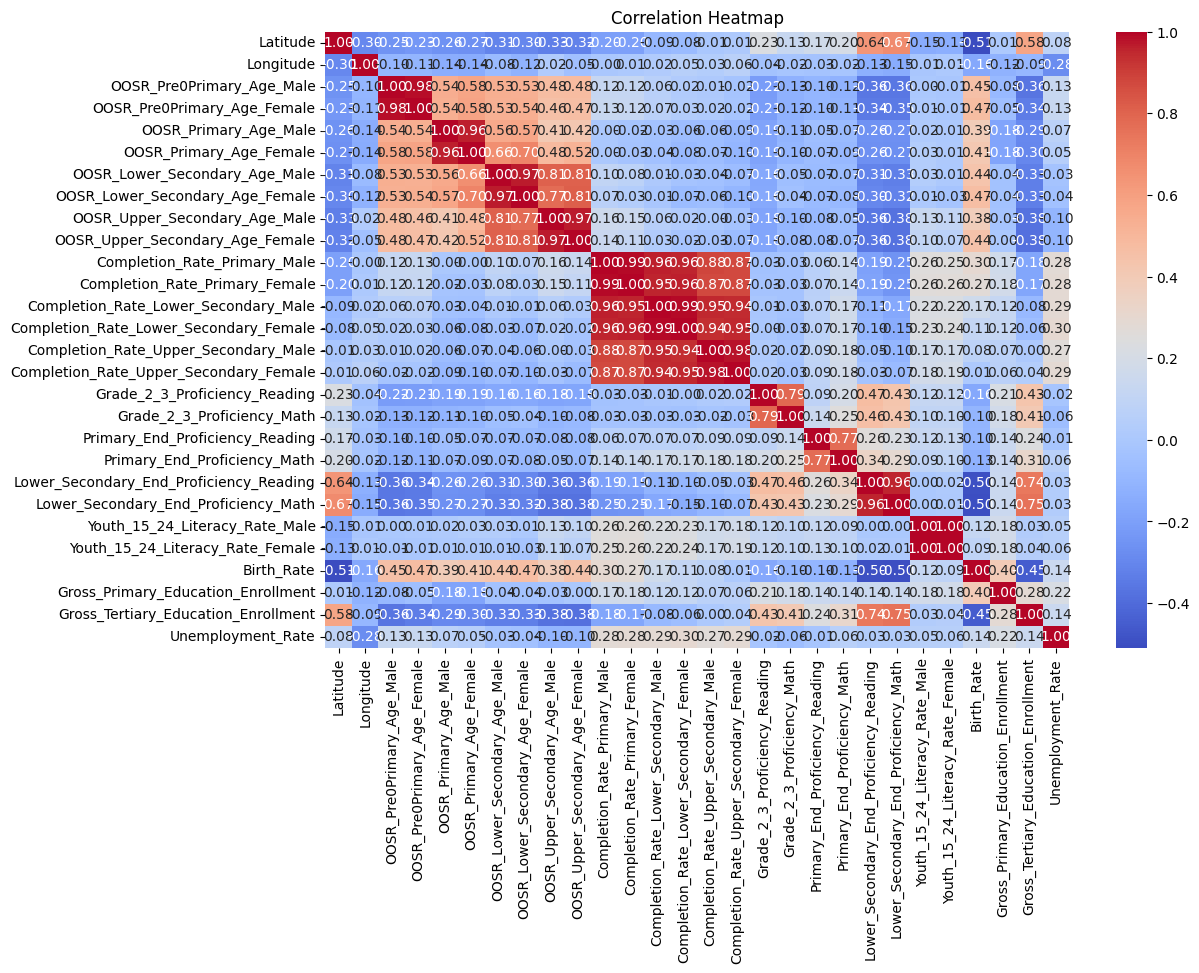


Average Enrollment Rates:
                                   OOSR_Primary_Age_Male  \
Countries and areas                                       
Afghanistan                                         0.0   
Albania                                             6.0   
Algeria                                             0.0   
Andorra                                             0.0   
Angola                                              0.0   
Anguilla                                            0.0   
Antigua and Barbuda                                 4.0   
Argentina                                           0.0   
Armenia                                             9.0   
Australia                                           0.0   
Austria                                             0.0   
Azerbaijan                                         10.0   
Bahrain                                             2.0   
Bangladesh                                          0.0   
Barbados                    

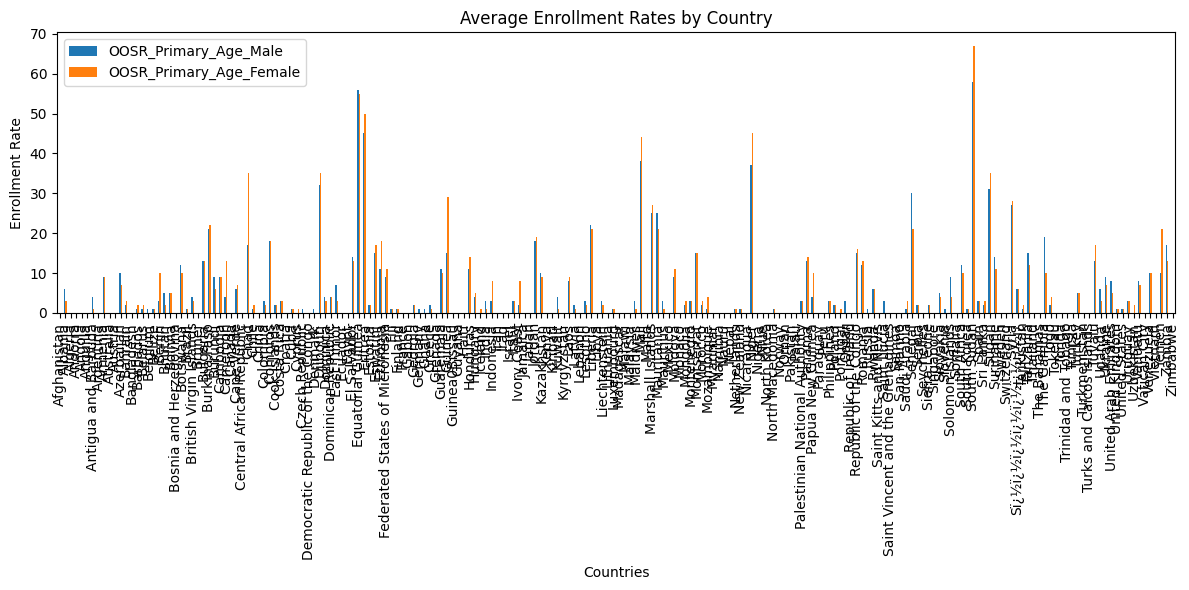

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming this part is already done)
file_path = 'C:/Users/user/Desktop/SCM_practicals/python/EDA/Global_Education.csv'
df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')

# Ensure proper data types (you may want to adjust this based on your dataset)
df.columns = df.columns.str.strip()

# --- Data Analysis ---

# 1. Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# 2. Check Data Types
print("\nData Types:\n", df.dtypes)

# 3. Correlation Analysis (only for numeric columns)
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation = numeric_df.corr()
print("\nCorrelation Matrix:\n", correlation)

# 4. Heatmap for Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# 5. Example of Grouping and Aggregation: Average enrollment rates
# Adjust the column names based on your dataset
if 'OOSR_Primary_Age_Male' in df.columns and 'OOSR_Primary_Age_Female' in df.columns:
    avg_enrollment = df.groupby('Countries and areas')[['OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female']].mean()
    print("\nAverage Enrollment Rates:\n", avg_enrollment)

    # 6. Plotting Average Enrollment Rates
    avg_enrollment.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Enrollment Rates by Country')
    plt.ylabel('Enrollment Rate')
    plt.xlabel('Countries')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

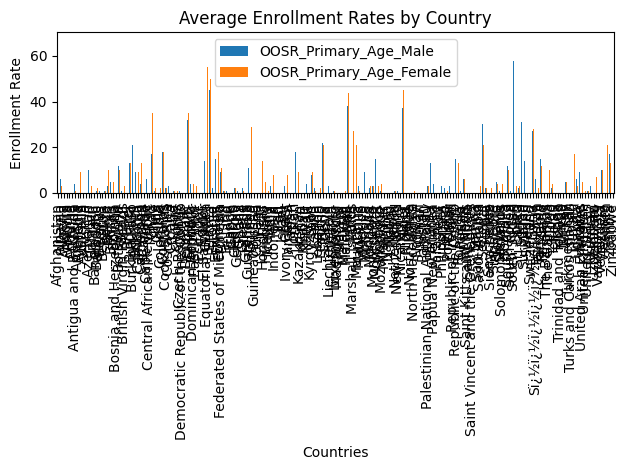

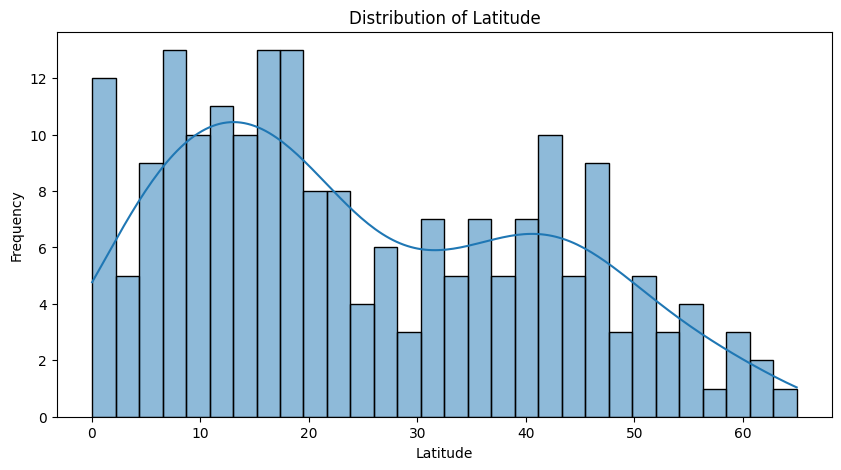

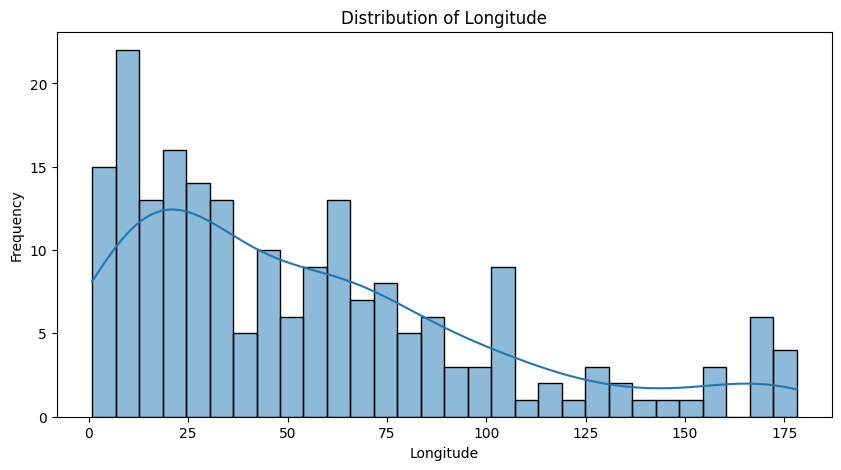

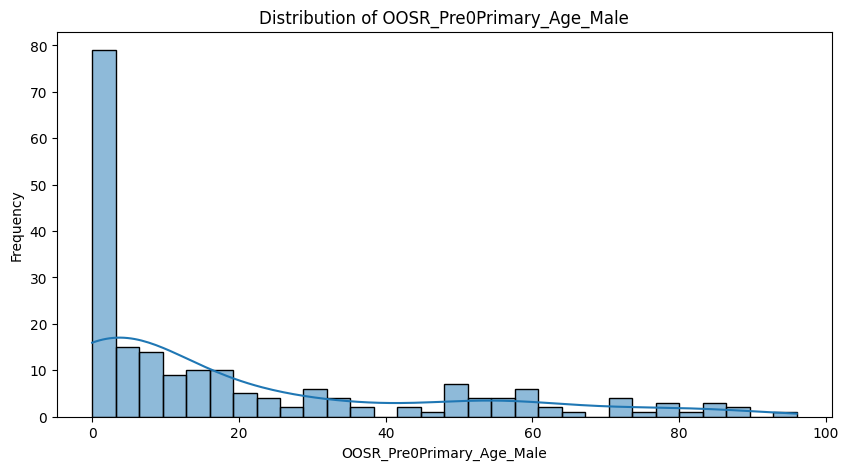

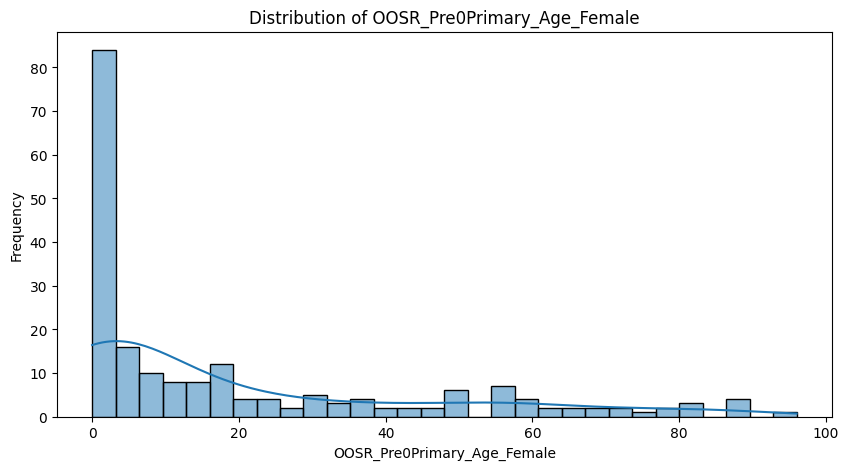

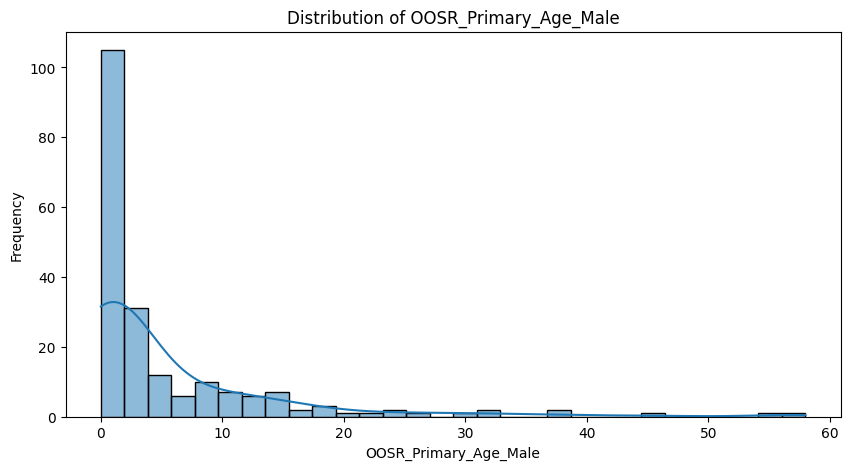

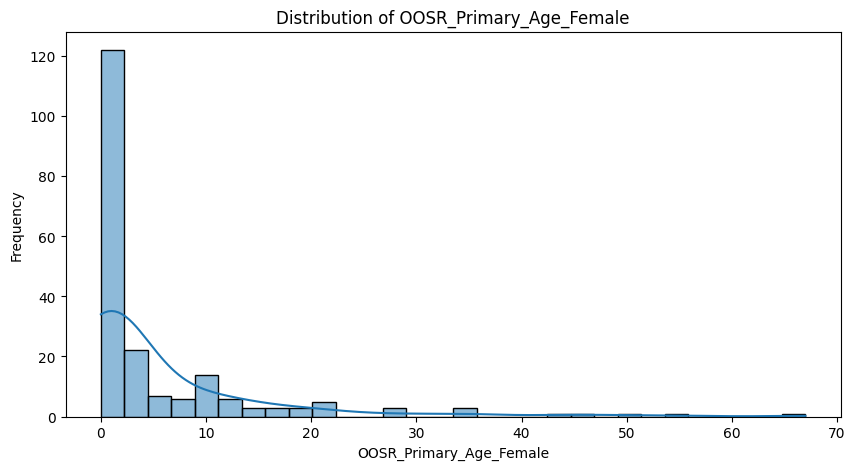

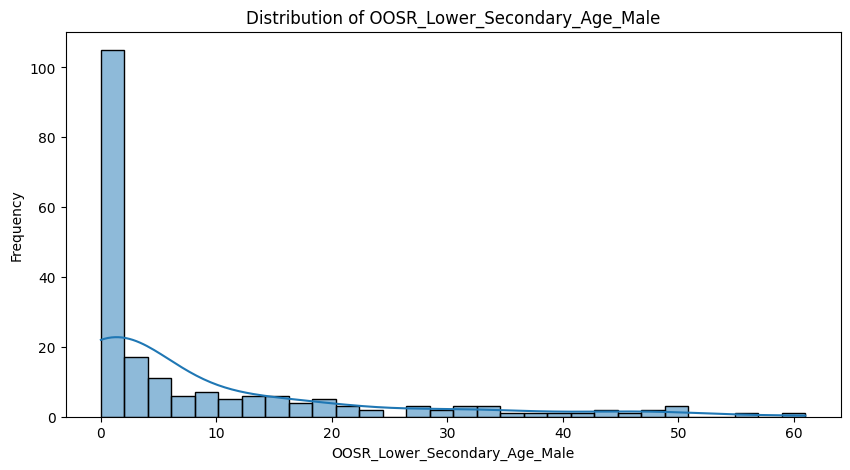

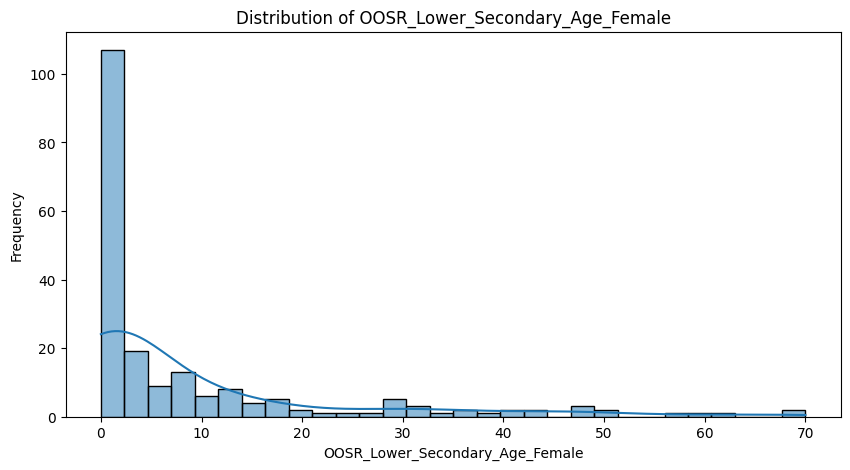

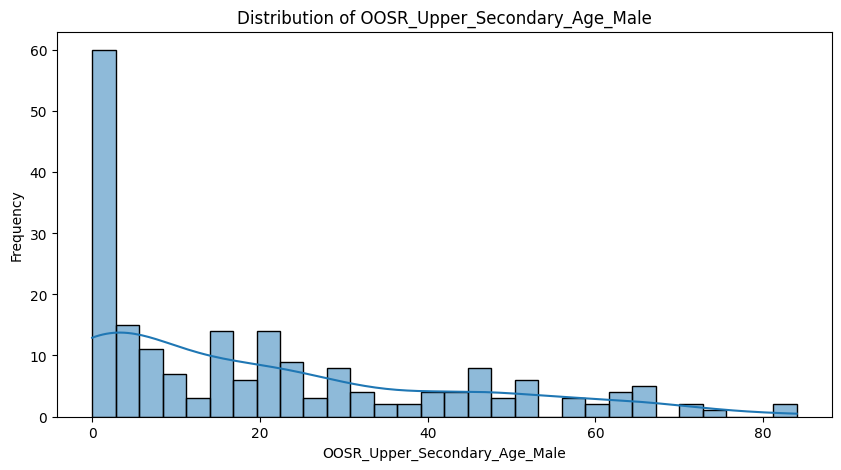

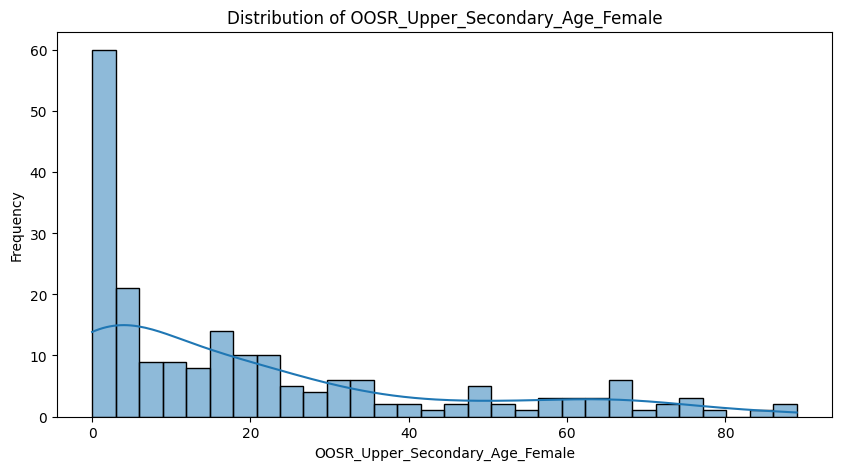

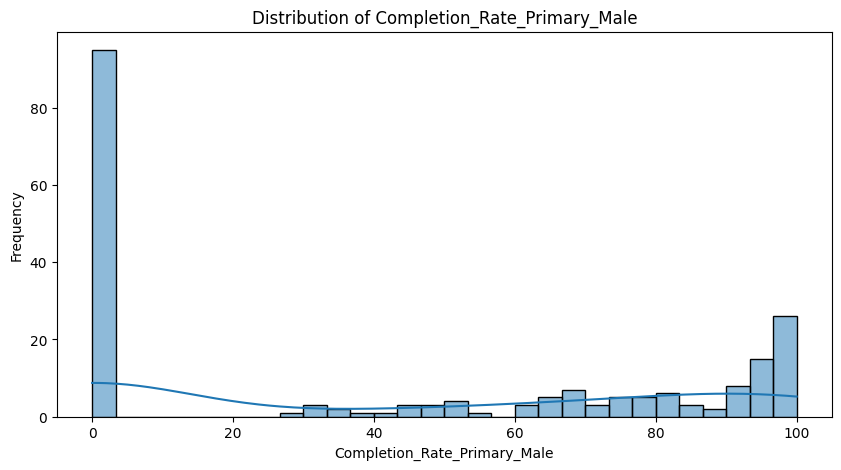

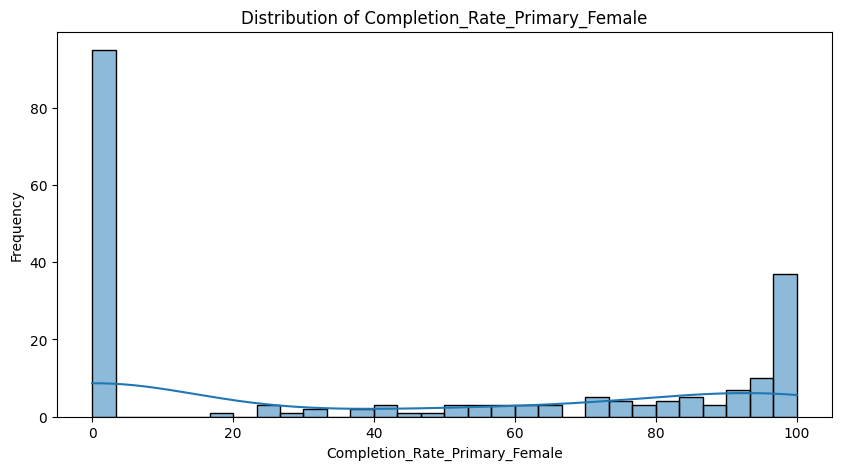

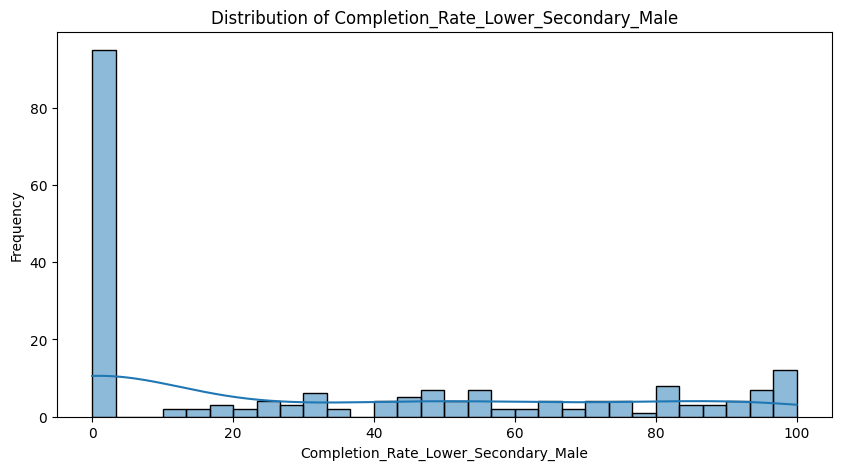

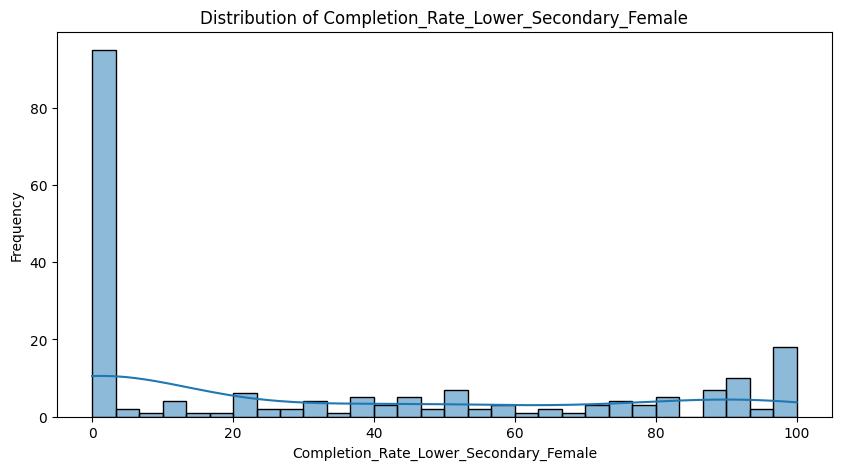

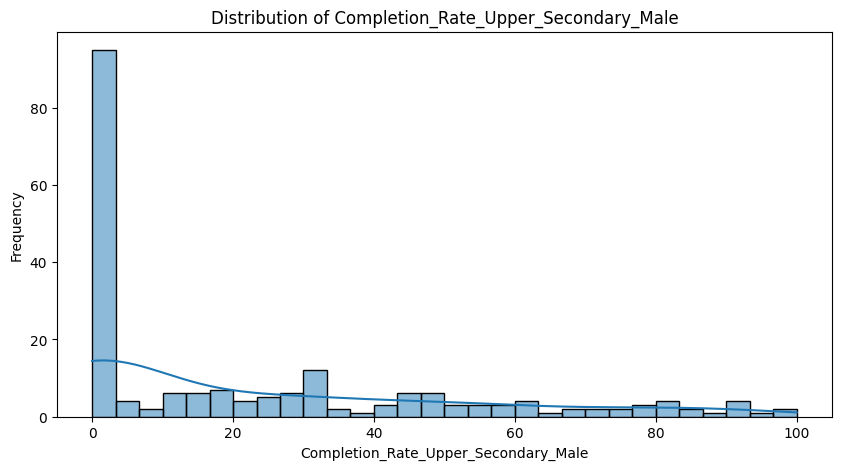

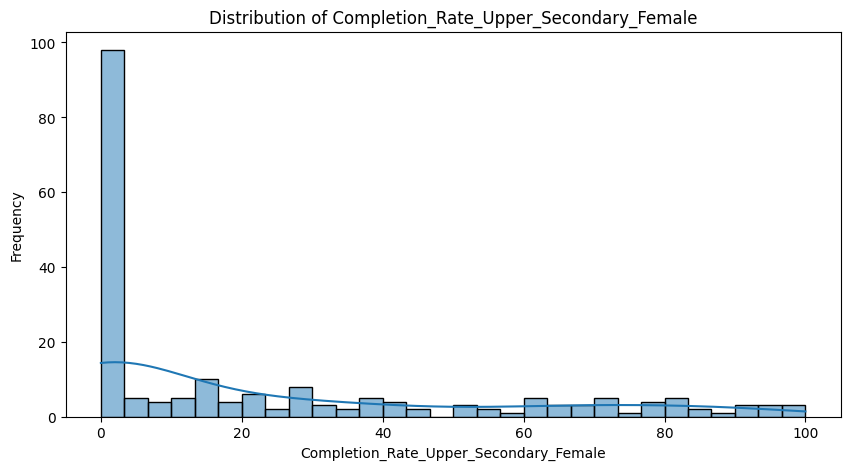

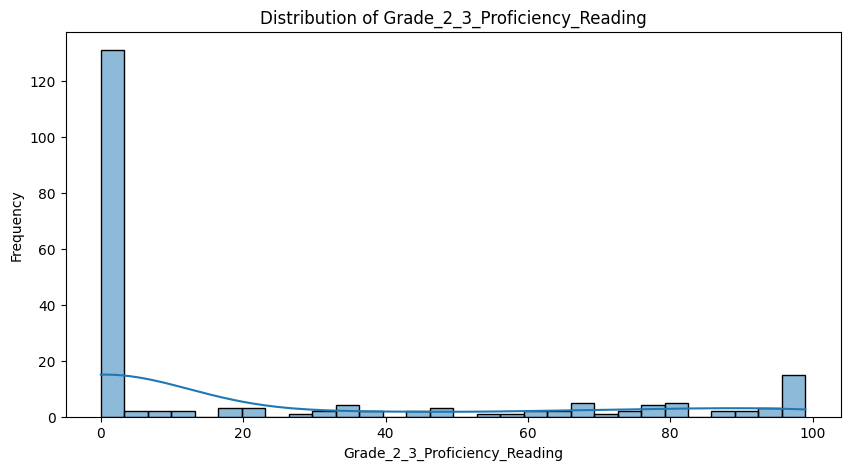

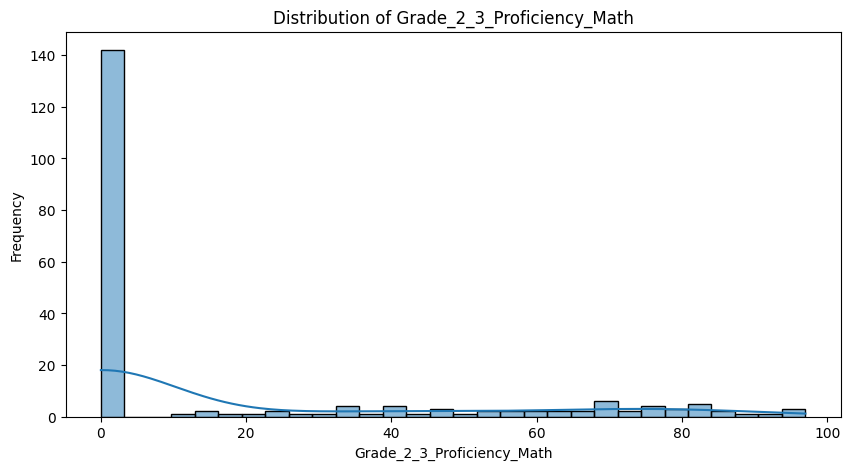

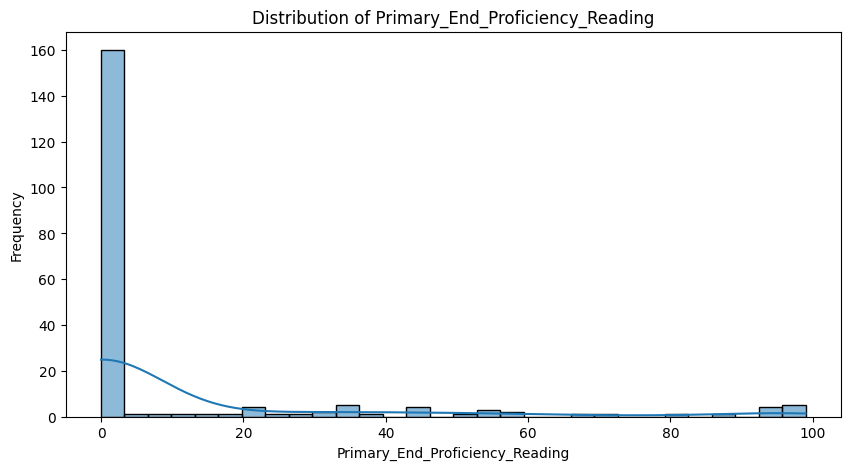

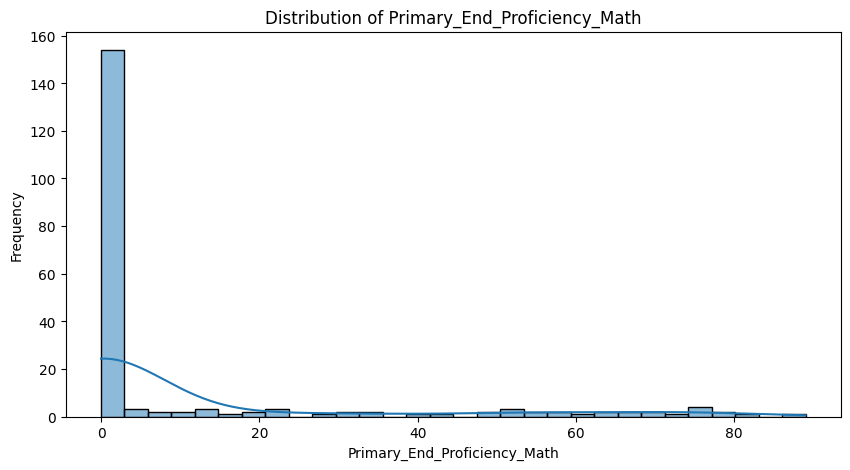

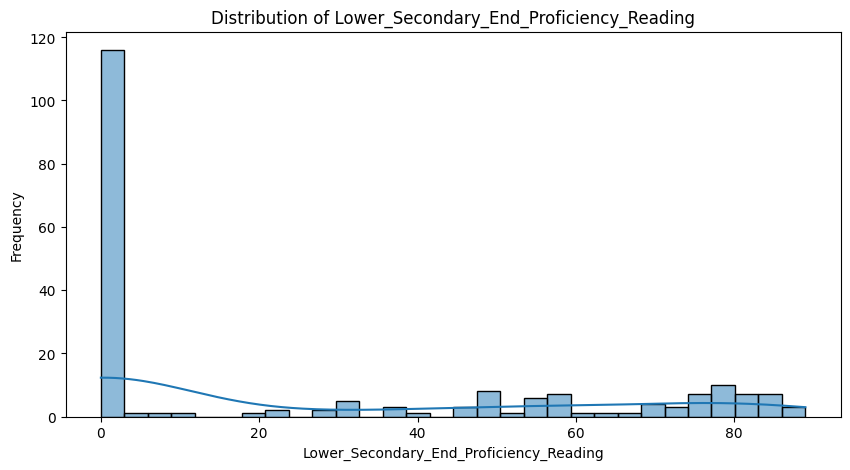

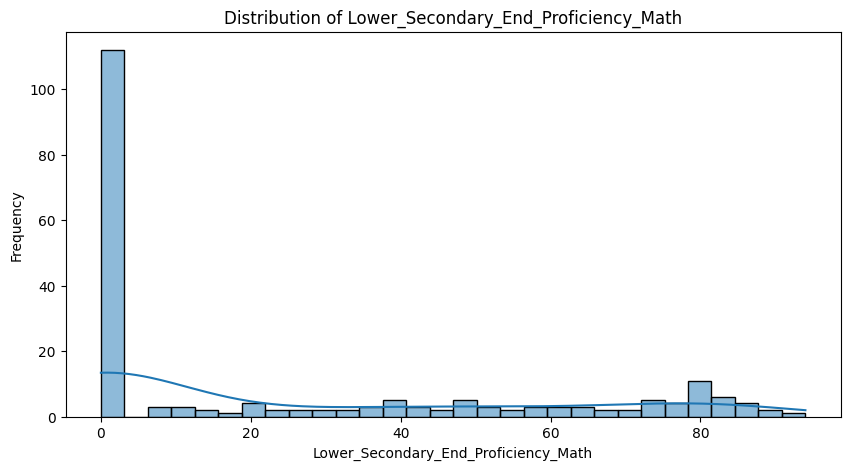

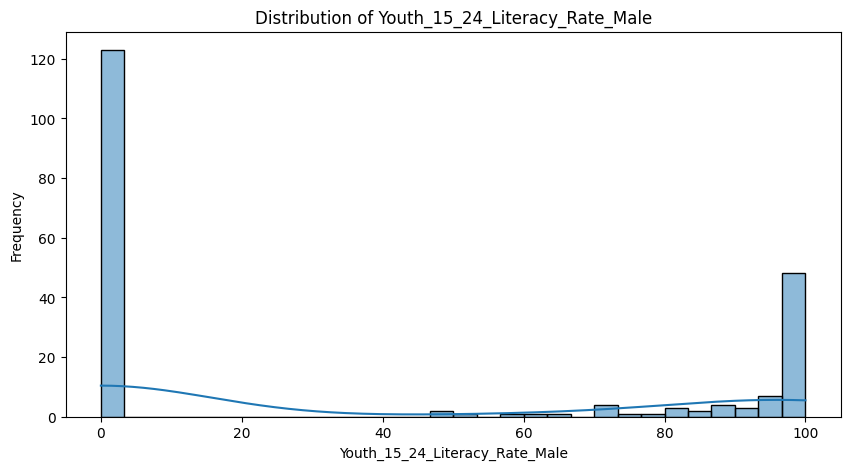

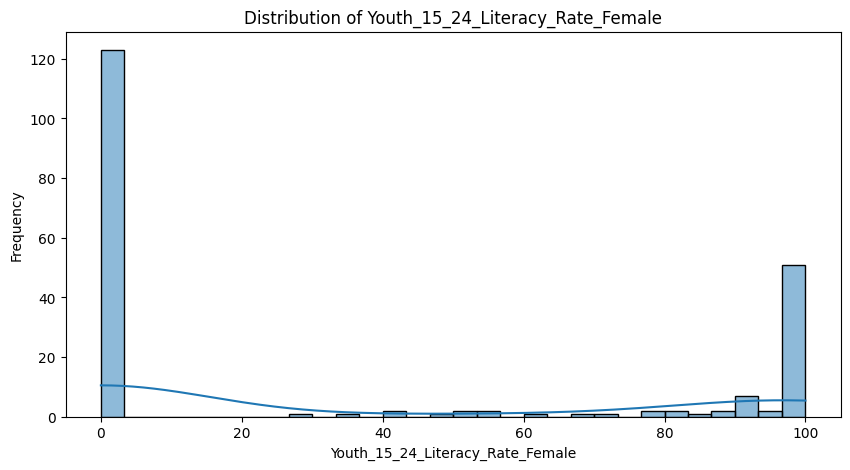

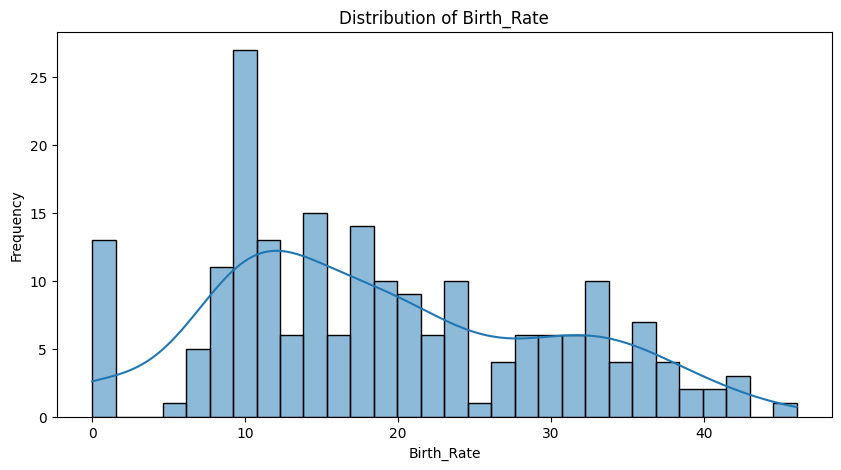

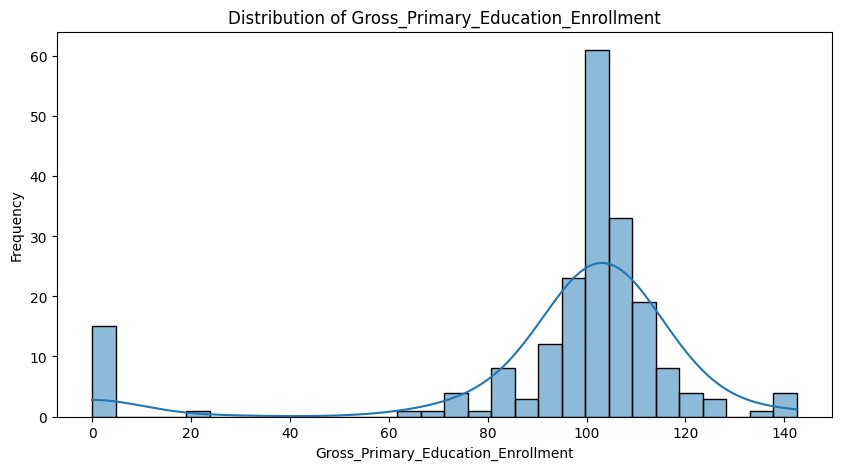

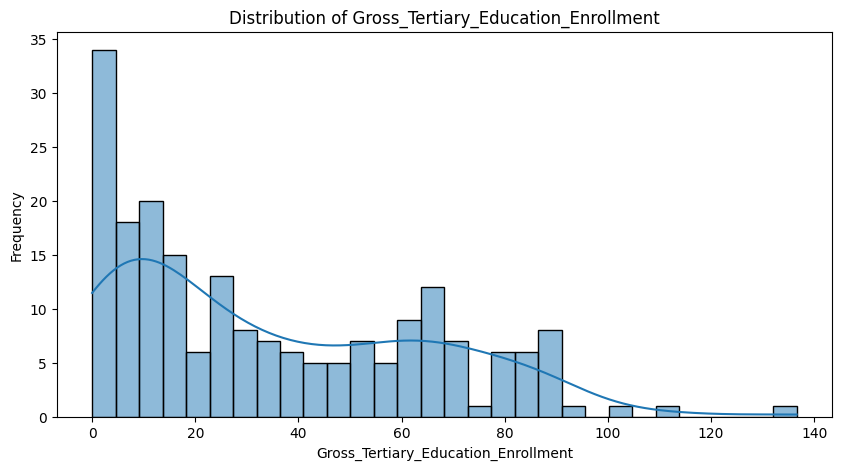

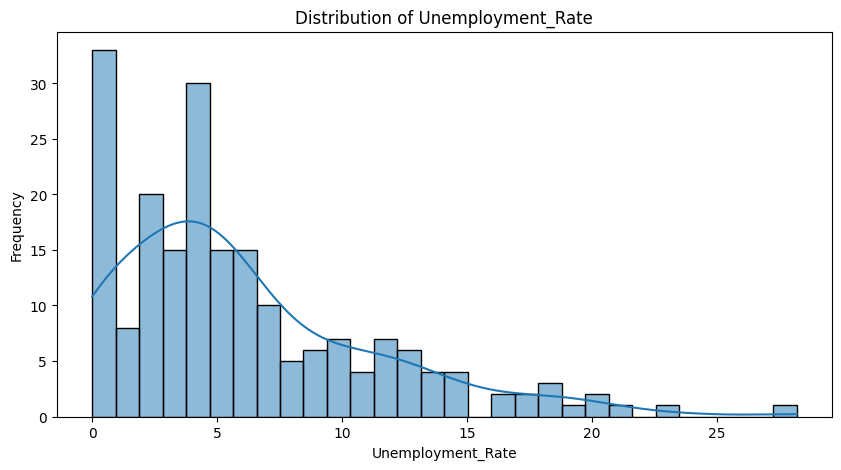

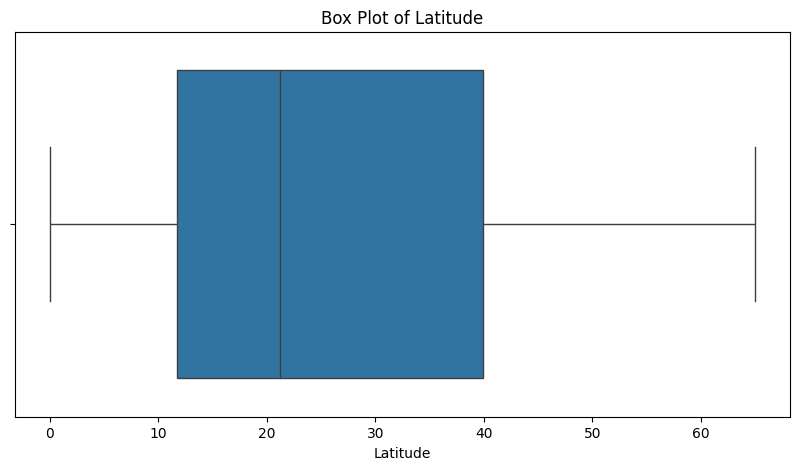

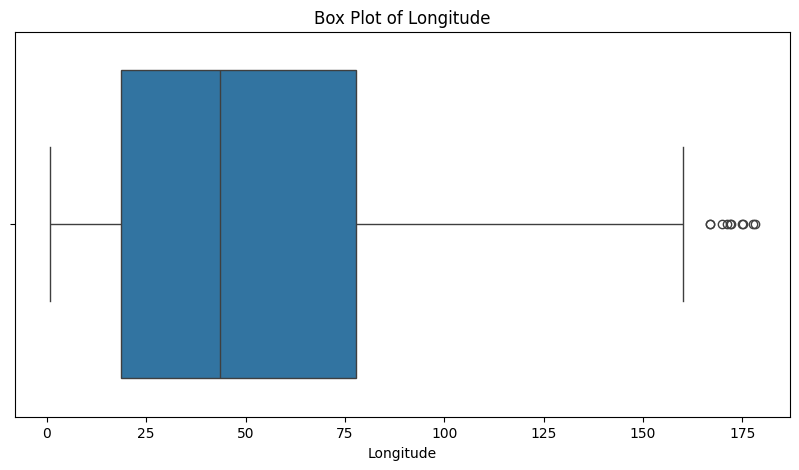

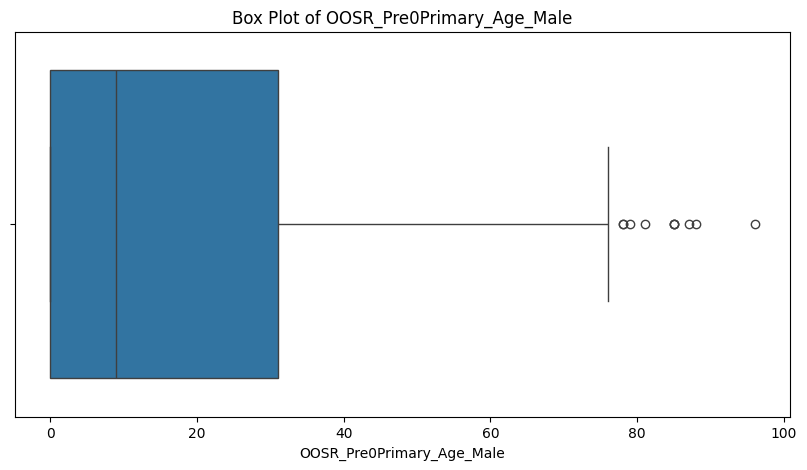

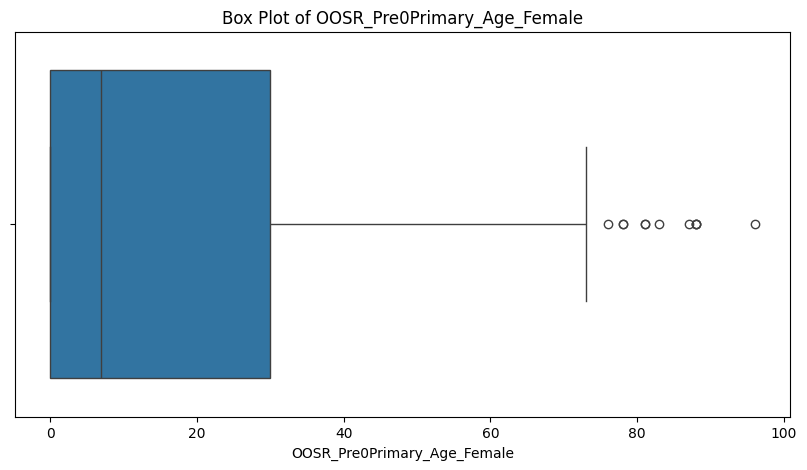

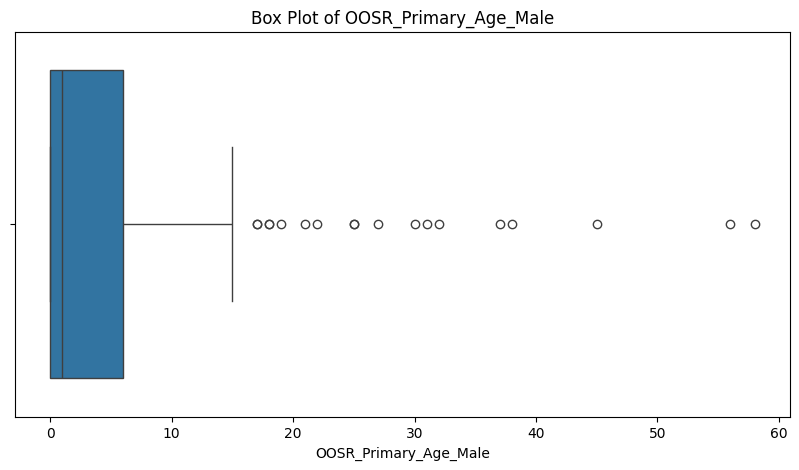

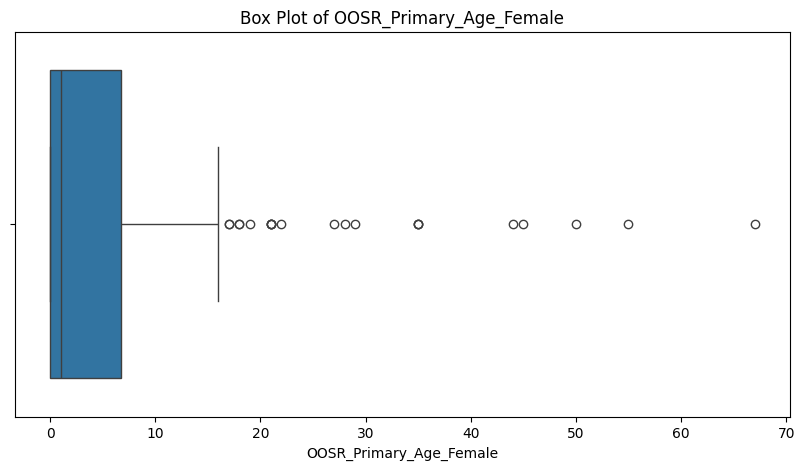

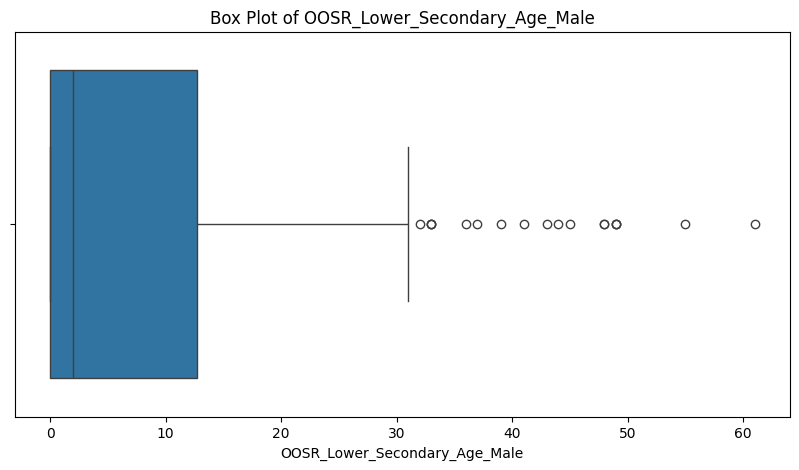

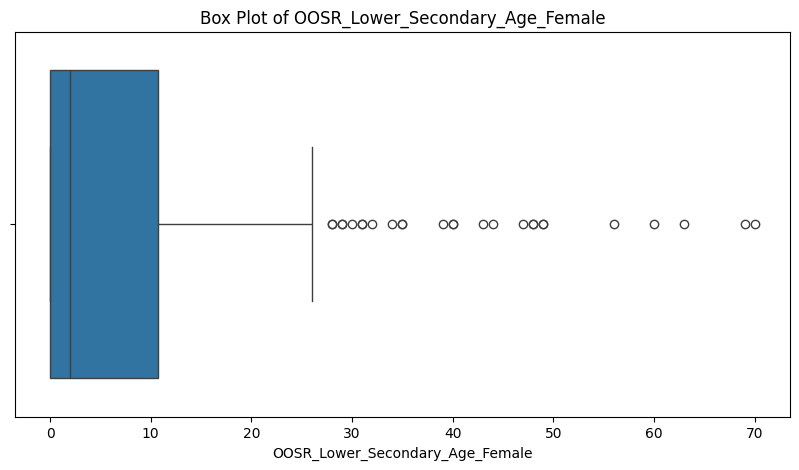

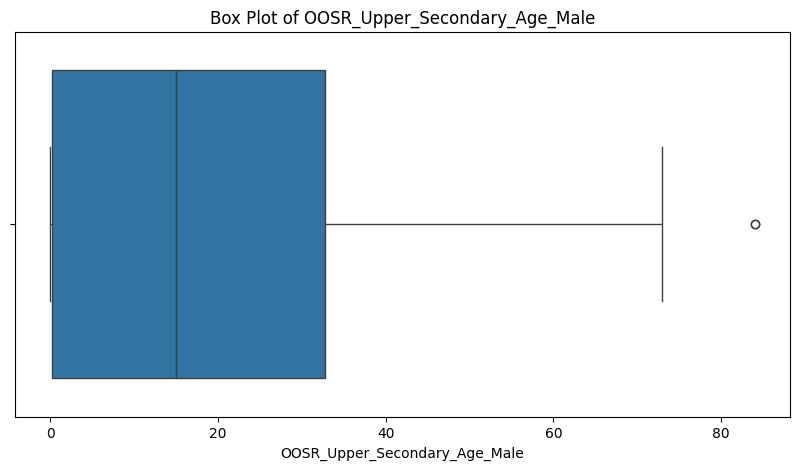

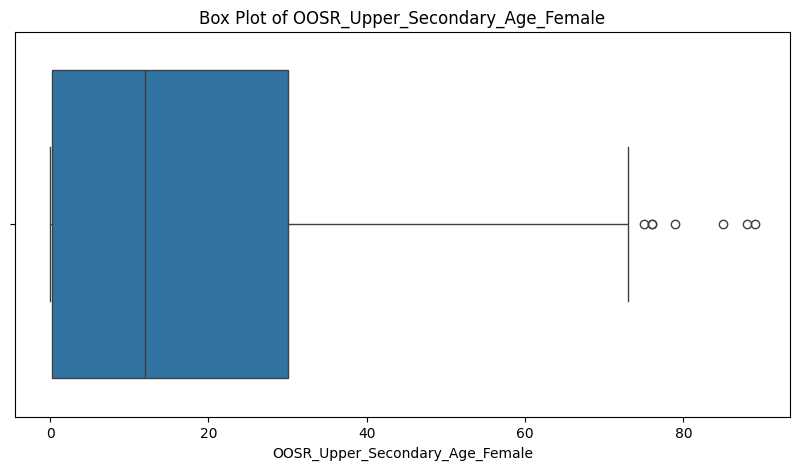

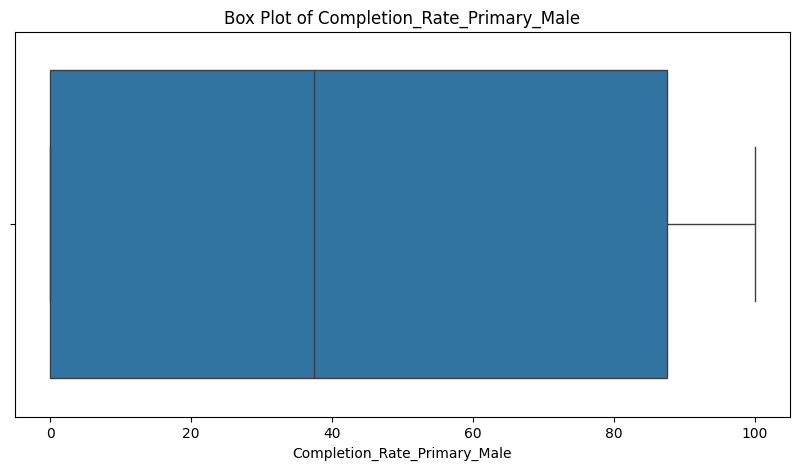

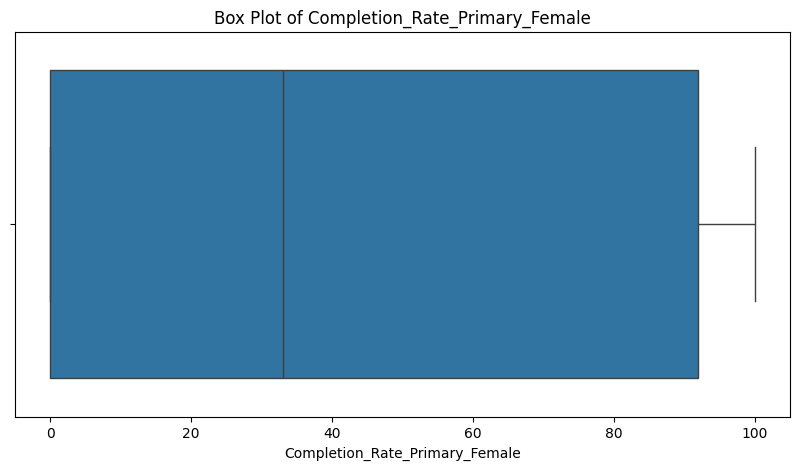

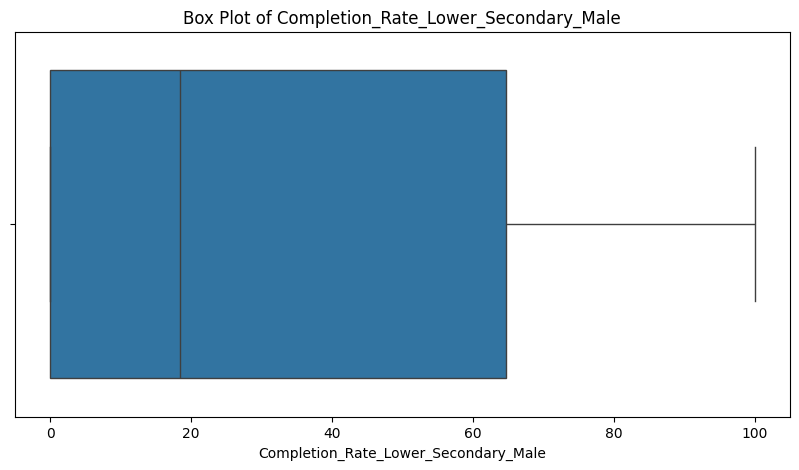

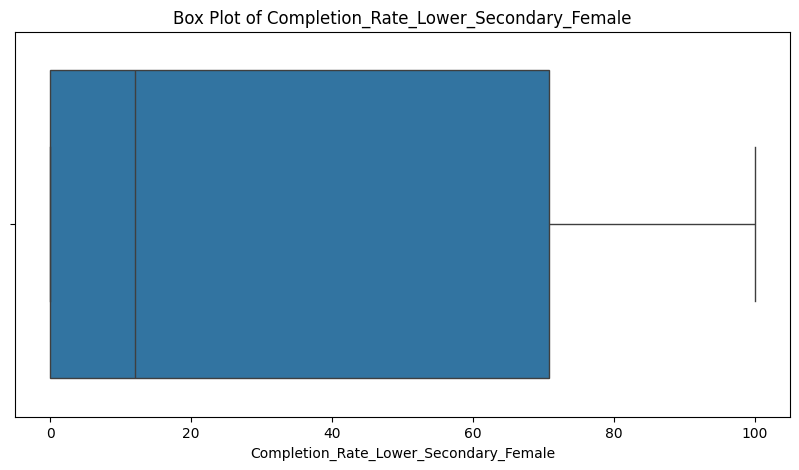

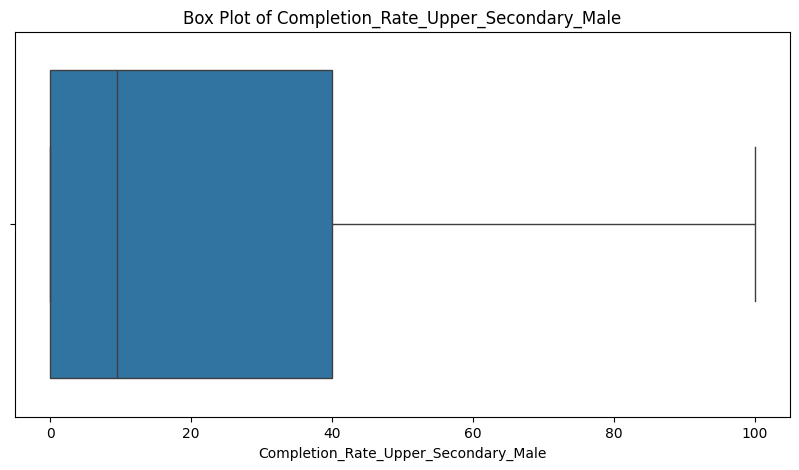

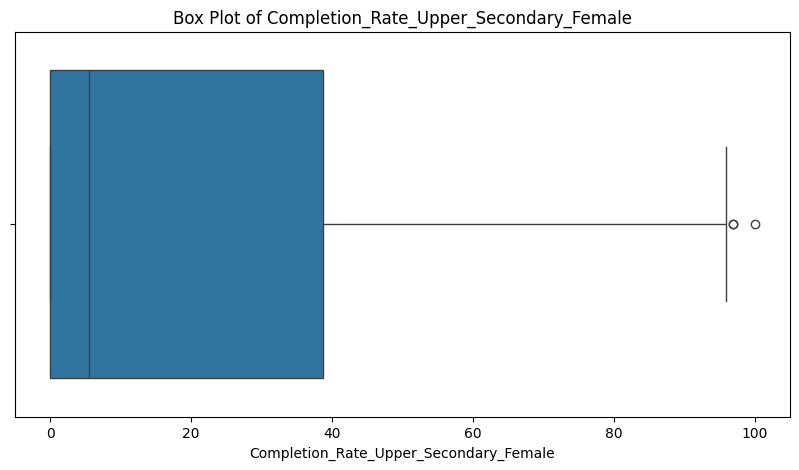

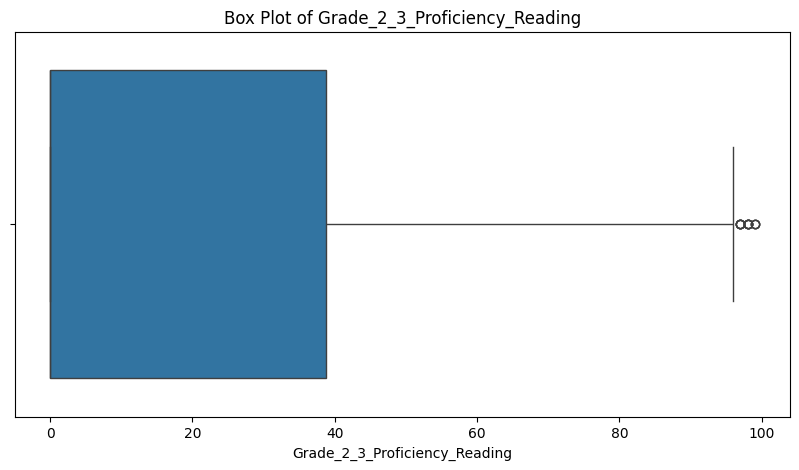

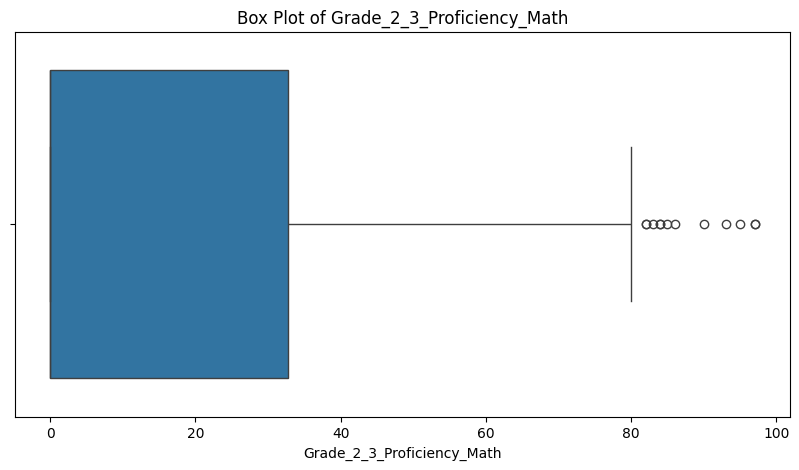

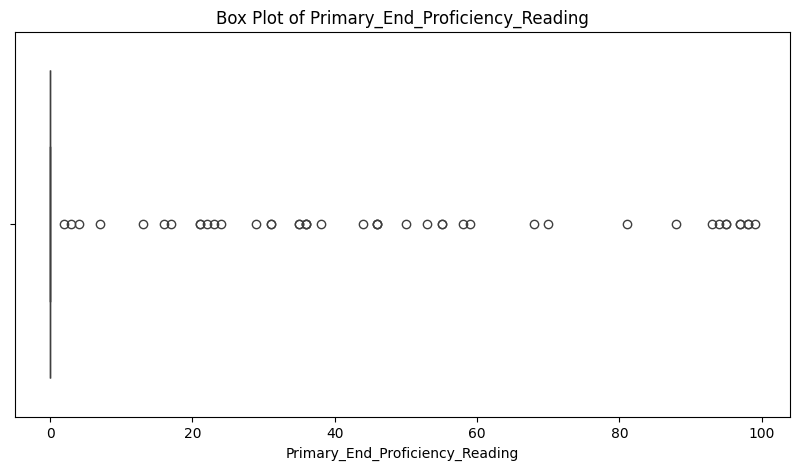

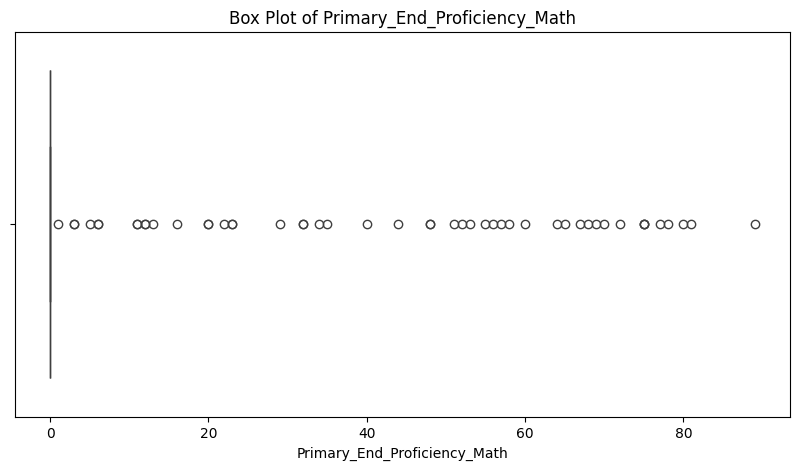

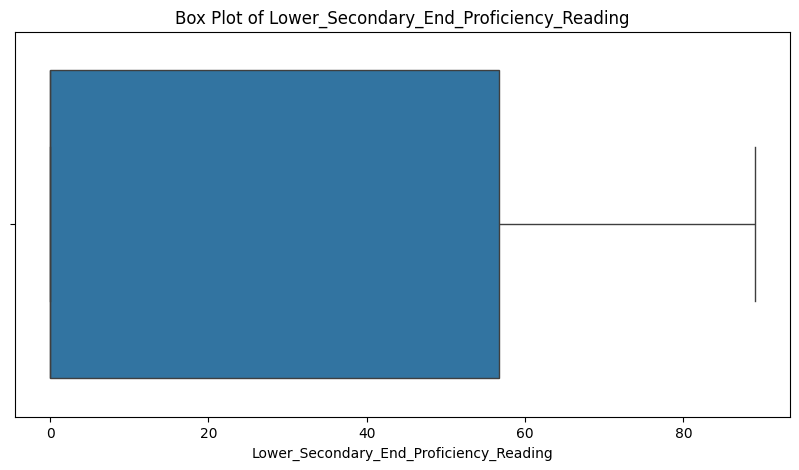

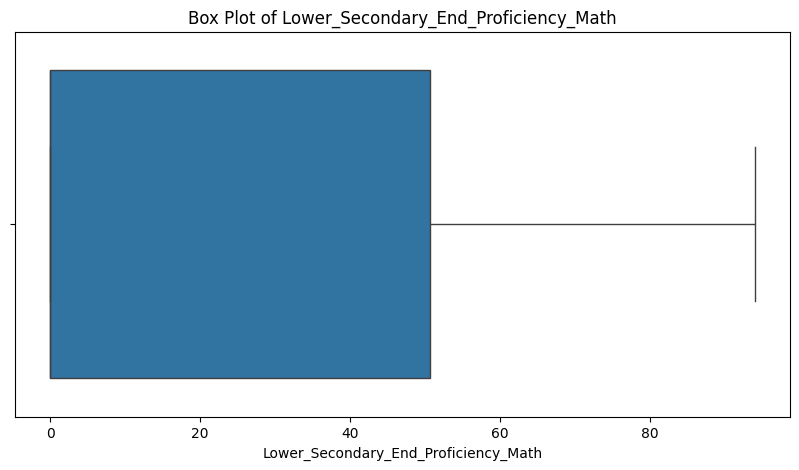

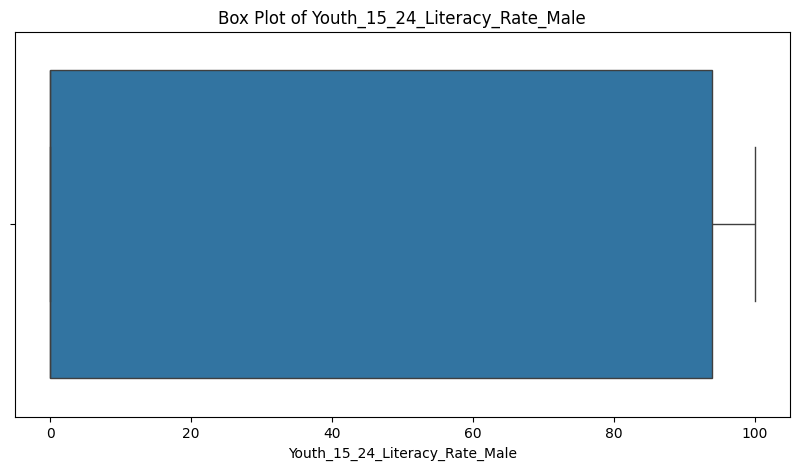

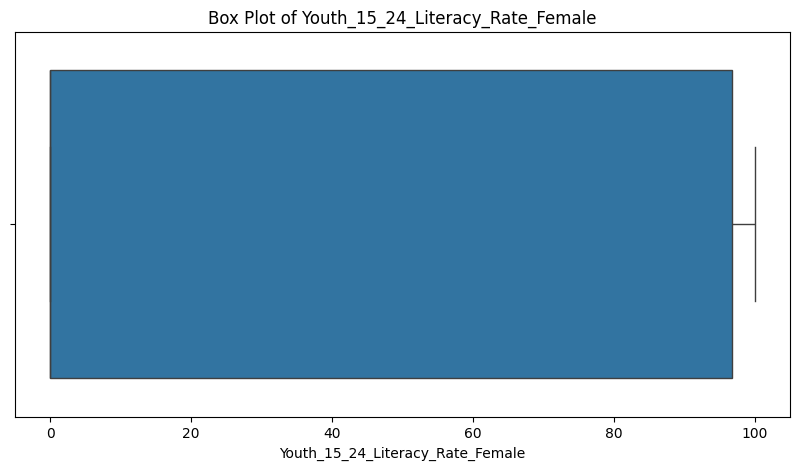

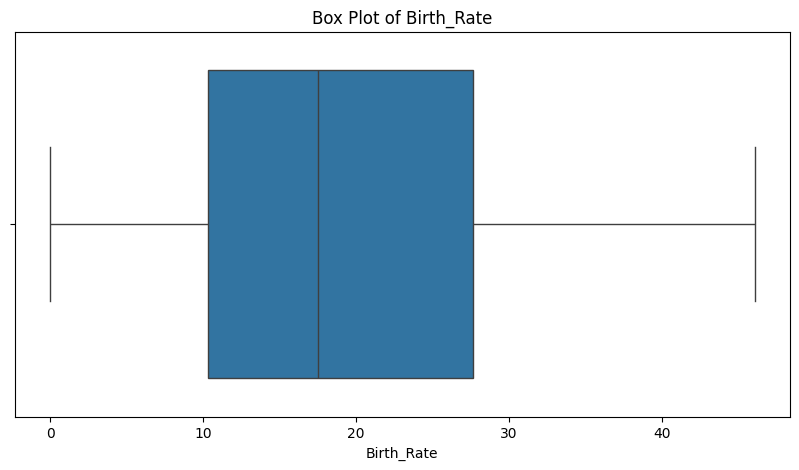

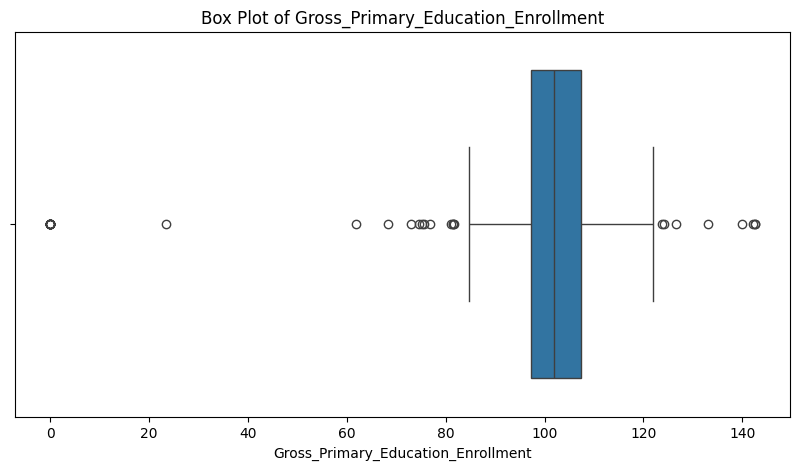

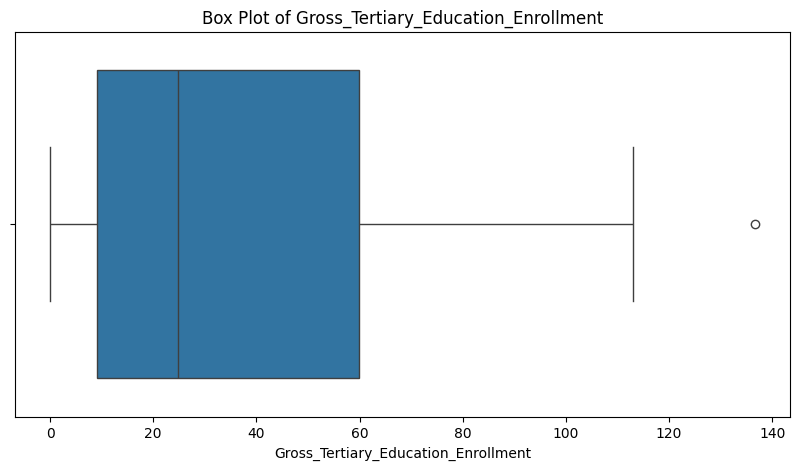

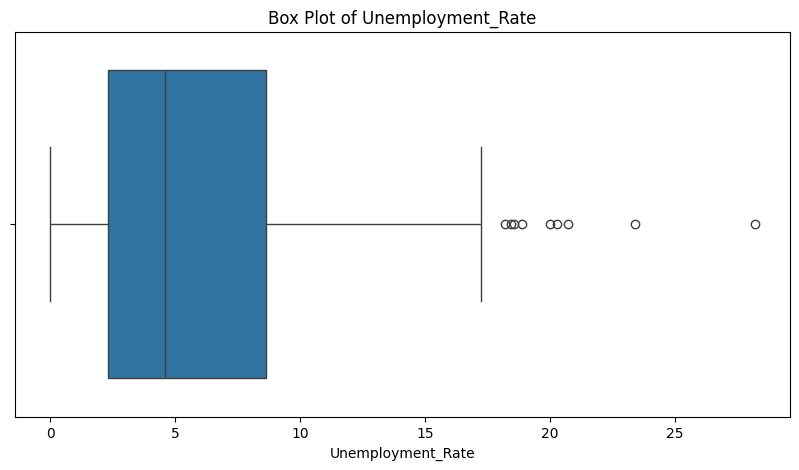

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/user/Desktop/SCM_practicals/python/EDA/Global_Education.csv'
df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')

# Clean column names
df.columns = df.columns.str.strip()

# --- Data Visualization ---

# Check if required columns exist
if 'OOSR_Primary_Age_Male' in df.columns and 'OOSR_Primary_Age_Female' in df.columns:
    # 1. Average Enrollment Rates by Country
    avg_enrollment = df.groupby('Countries and areas')[['OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female']].mean()
    
    # Bar Plot for Average Enrollment Rates
    plt.figure(figsize=(12, 6))
    avg_enrollment.plot(kind='bar')
    plt.title('Average Enrollment Rates by Country')
    plt.ylabel('Enrollment Rate')
    plt.xlabel('Countries')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 2. Histograms for Distribution of Numerical Columns
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
for column in numeric_df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=30, kde=True)  # Using seaborn for enhanced histograms
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# 3. Box Plots for Spread and Outliers
for column in numeric_df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()
